In [172]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [173]:
import numpy as np
import pandas as pd

In [174]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [175]:

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [176]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [177]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [178]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [179]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [180]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [181]:
hawaii_data = pd.read_sql("SELECT * FROM Measurement where Date >='2016-08-23' and Date <= '2017-08-23' ", conn)
hawaii_data

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


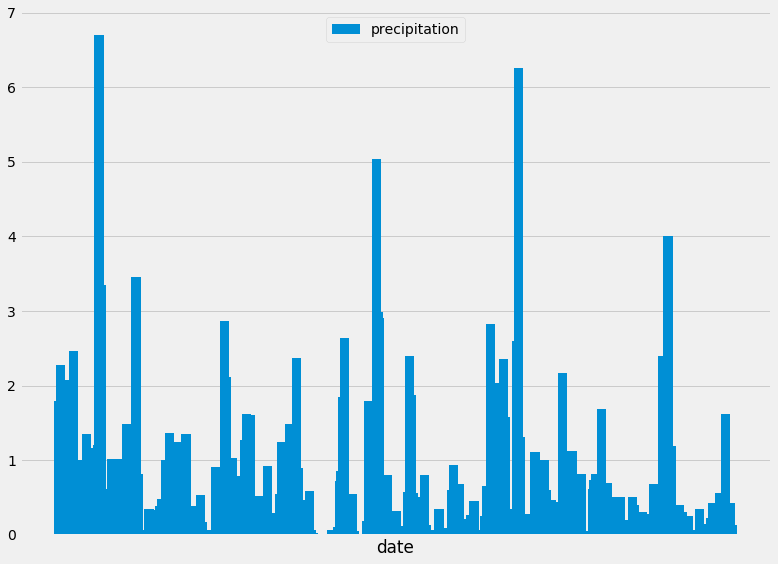

In [182]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#engine.execute("SELECT * FROM Measurement").fetchall()

hawaii_data = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    group_by(Measurement.date).all()

prcp_df = pd.DataFrame(hawaii_data, columns=['date', 'prcp'])
prcp_df
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

# Perform a query to retrieve the data and precipitation scores
ydata = pd.DataFrame(last_year)
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
ydata.set_index('date', inplace=True, )
ydata

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(12,9))
plt.bar(ydata.index,ydata["prcp"], width=5)
ax.set_xticks([])
plt.xlabel("date")
plt.legend(("precipitation",), loc='upper center')

![precipitation](Images/precipitation.png)

In [183]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ydata.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [57]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
stations

9

In [184]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [185]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=="USC00519281").all()
temp_station

[(54.0, 85.0, 71.66378066378067)]

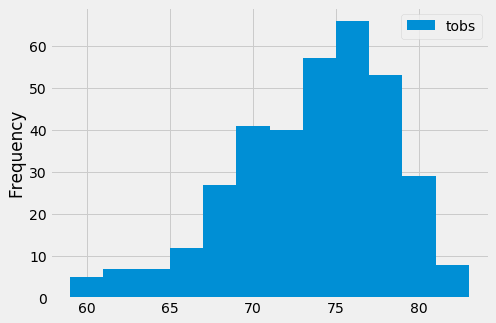

In [186]:
# Choose the station with the highest number of temperature observations.
highest_station = session.query(Measurement.station, func.max(Measurement.tobs)).all()
highest_station

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


active_last_year = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').\
filter(Measurement.date.between('2016-08-23', '2017-08-23'))


df = pd.DataFrame(active_last_year)
ax = df.plot.hist(bins=12,figsize=(7,5))

![precipitation](Images/station-histogram.png)

In [187]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [188]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


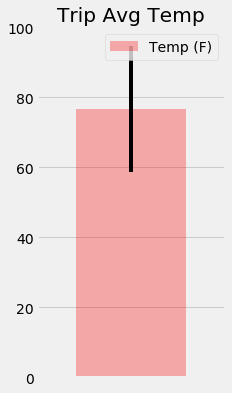

In [191]:
temps = calc_temps('2017-05-22', '2017-06-14')
avg_temp = pd.DataFrame(temps, columns = ["Min", "Average","Max"])
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
AT = avg_temp.plot(kind='bar', y='Average', yerr = avg_temp.Max - avg_temp.Min, 
             title='Trip Avg Temp', label='Temp (F)',figsize=(3,6), width=.70,alpha=.3,color='r')
AT.set_xticks([])
AT.set_yticks([0,20,40,60,80,100])

In [192]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation,
                              func.sum(Measurement.prcp)).\
filter(Measurement.station== Station.station).\
order_by(func.sum(Measurement.prcp).desc())

filter('2017-05-22', '2017-06-14')


total_rainfall.all()

[('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2908.1299999999706)]

## Optional Challenge Assignment

In [153]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [171]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


SyntaxError: 'return' outside function (<ipython-input-171-95ea159689d1>, line 4)

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


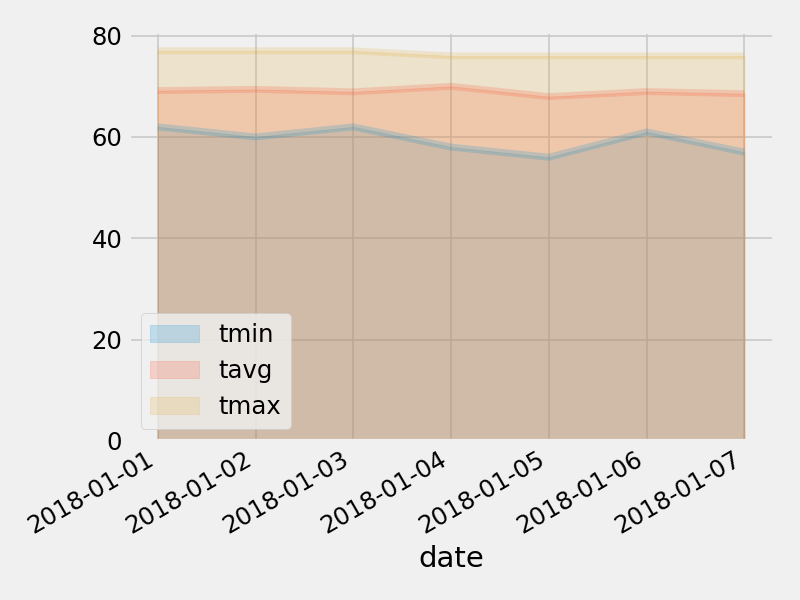

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
